<a href="https://colab.research.google.com/github/LinjingBi/ai_robotics_lab/blob/main/week5/lab_week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm
from numpy.random import default_rng
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


To simplify the computation, also because the data is 1D, we use variance(standard deviation ** 2) instead of covariance(EM).

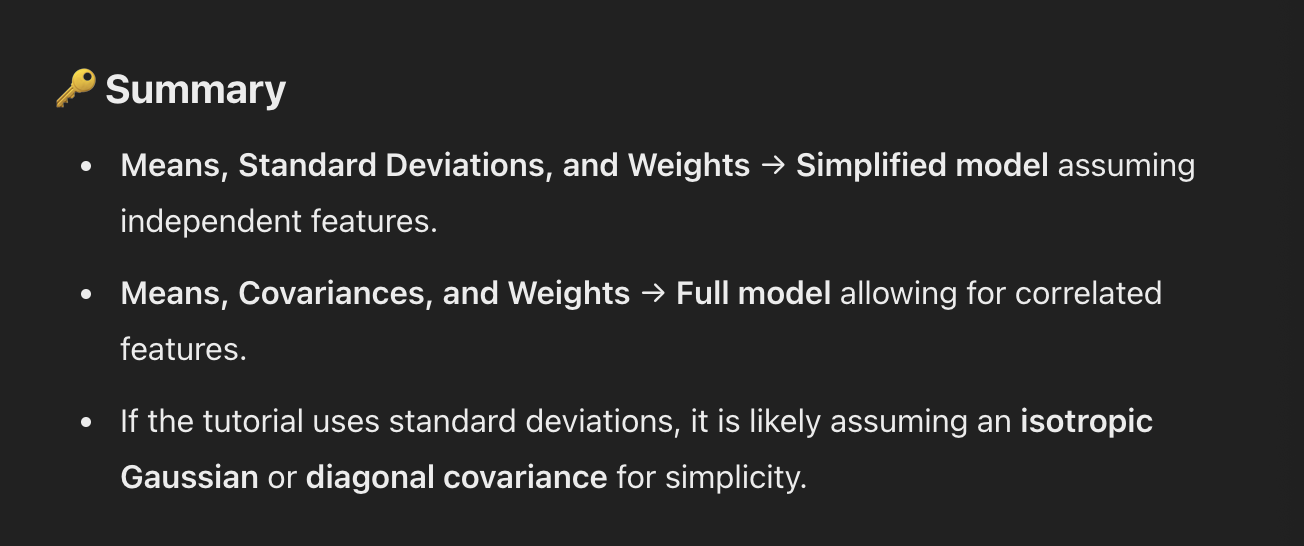

(1000,)
(500,)
(1500,)


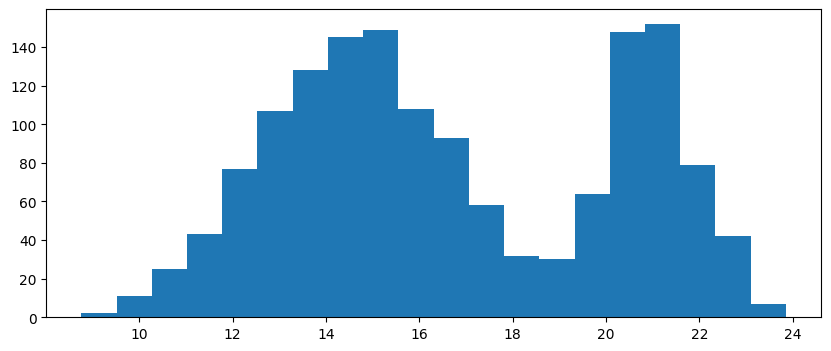

In [2]:
rng = default_rng(100)

x1 = rng.normal(loc=14.5, scale=2, size=1000) # a normal distribution with mean 14.5 and std dev 2
x2 = rng.normal(loc=21, scale=1, size=500) # a normal distribution with mean 21 and std dev 1
print(x1.shape)
print(x2.shape)

X = np.hstack([x1, x2])
print(X.shape)
fig, ax = plt.subplots(figsize=(10, 4))
n, bins, patch = plt.hist(X, bins=20) # bins is the edges of each bin in the plot

bin_length = bins[1] - bins[0]
sf1 = bin_length*len(x1)
sf2 = bin_length*len(x2)

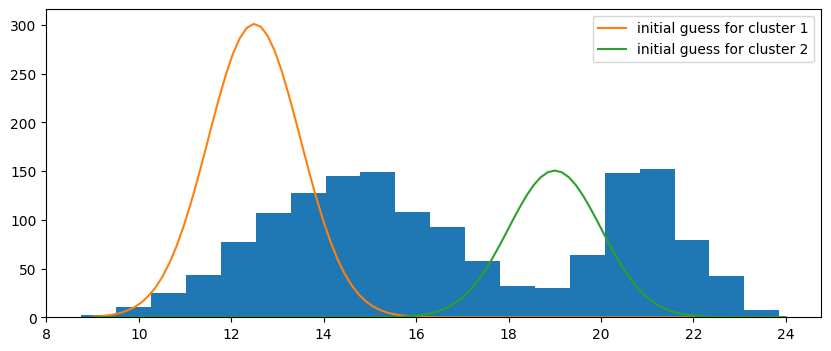

In [3]:
# Means
mu1=12.5
mu2=19
# Std devs
sigma1=1
sigma2=1
# Weights
w1=0.5
w2=0.5
xs=np.linspace(9, 24, 100)
ax.plot(xs, norm.pdf(xs, loc=mu1, scale=sigma1)*sf1, label='initial guess for cluster 1')
ax.plot(xs, norm.pdf(xs, loc=mu2, scale=sigma2)*sf2, label='initial guess for cluster 2')

ax.legend();
fig

In [4]:
def calc_responsibilities(x, means, stds, ws):
  wfs = np.empty((ws.shape[0], x.shape[0]))
  for i in range(ws.shape[0]):
    wfs[i] = ws[i]*norm.pdf(x, loc=means[i], scale=stds[i])

  rsps = wfs/ wfs.sum(0)
  return rsps

means = np.array([12.5, 19])
stds = np.array([1, 1])
ws = np.array([0.5, 0.5])

calc_responsibilities(np.array([12]), means, stds, ws)
resps = calc_responsibilities(X, means, stds, ws)

In [5]:
def calc_means(x, resps):
  return (resps * x).sum(1) / resps.sum(1)

new_means = calc_means(X, resps)
print(new_means)

[13.63243613 19.56425555]


In [6]:
def calc_stds(x, means, resps):
  return ((resps * (x[None, :] - means[:, None])**2).sum(1) / resps.sum(1)) ** 0.5

new_stds = calc_stds(X, new_means, resps)

In [7]:
def calc_weights(x, resps):
  return resps.sum(1) / x.shape[0]

new_weights = calc_weights(X, resps)

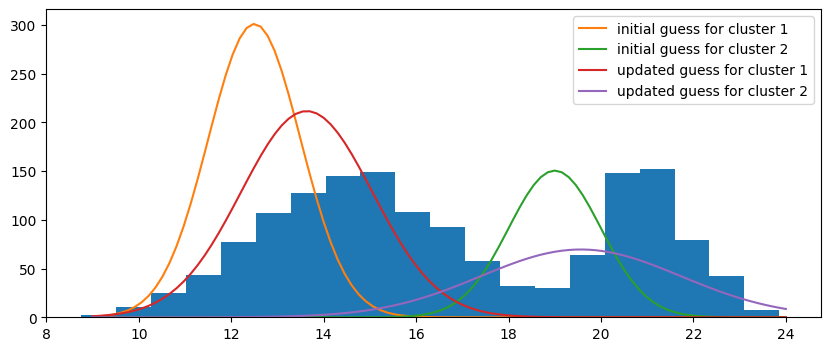

In [8]:
ax.plot(xs, norm.pdf(xs, loc=new_means[0], scale=new_stds[0])*sf1, label='updated guess for cluster 1')
ax.plot(xs, norm.pdf(xs, loc=new_means[1], scale=new_stds[1])*sf2, label='updated guess for cluster 2')
ax.legend()
fig

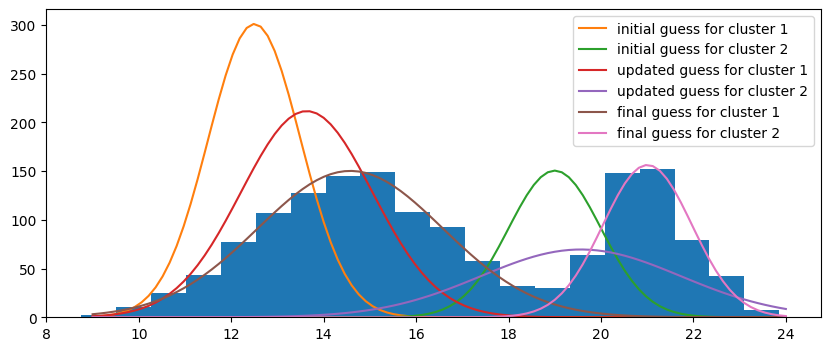

In [9]:
cur_rsps = resps
cur_means = new_means
cur_stds = new_stds
cur_weights = new_weights

while True:
  nxt_rsps = calc_responsibilities(X, cur_means, cur_stds, cur_weights)
  nxt_means = calc_means(X, nxt_rsps)
  nxt_stds = calc_stds(X, nxt_means, nxt_rsps)
  nxt_weights = calc_weights(X, nxt_rsps)

  if np.allclose(cur_means, nxt_means) and np.allclose(cur_stds, nxt_stds) and np.allclose(cur_weights, nxt_weights):
    break
  cur_means = nxt_means
  cur_stds = nxt_stds
  cur_weights = nxt_weights

ax.plot(xs, norm.pdf(xs, loc=nxt_means[0], scale=nxt_stds[0])*sf1, label='final guess for cluster 1')
ax.plot(xs, norm.pdf(xs, loc=nxt_means[1], scale=nxt_stds[1])*sf2, label='final guess for cluster 2')
ax.legend()
fig

In [30]:
data = datasets.load_iris().data

In [36]:
model = GaussianMixture(n_components=3)
model.fit(data)

print(model.means_)
print(model.covariances_)
model.predict(data)

[[5.006      3.428      1.462      0.246     ]
 [6.54639415 2.94946365 5.48364578 1.98726565]
 [5.9170732  2.77804839 4.20540364 1.29848217]]
[[[0.121765   0.097232   0.016028   0.010124  ]
  [0.097232   0.140817   0.011464   0.009112  ]
  [0.016028   0.011464   0.029557   0.005948  ]
  [0.010124   0.009112   0.005948   0.010885  ]]

 [[0.38744093 0.09223276 0.30244302 0.06087397]
  [0.09223276 0.11040914 0.08385112 0.05574334]
  [0.30244302 0.08385112 0.32589574 0.07276776]
  [0.06087397 0.05574334 0.07276776 0.08484505]]

 [[0.2755171  0.09662295 0.18547072 0.05478901]
  [0.09662295 0.09255152 0.09103431 0.04299899]
  [0.18547072 0.09103431 0.20235849 0.06171383]
  [0.05478901 0.04299899 0.06171383 0.03233775]]]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

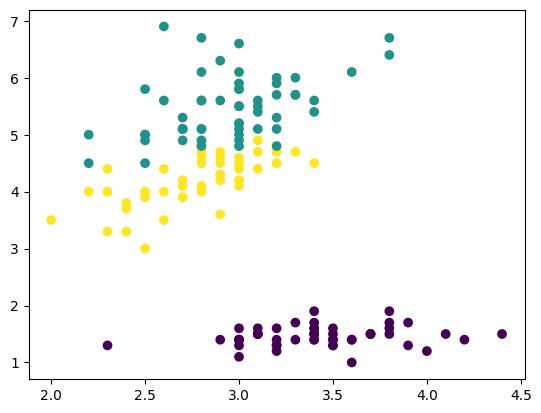

In [38]:
plt.figure()
plt.scatter(data[:, 1], data[:, 2], c=model.predict(data))

Text(0, 0.5, 'Information Criterion')

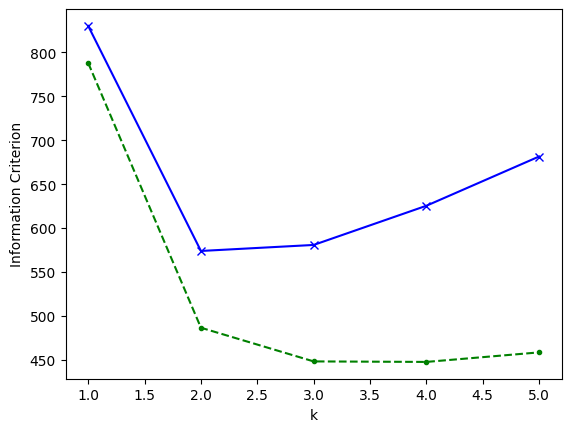

In [39]:
"""
Handily, the Scikit-learn’s GaussianMixture has two
built-in information criterion methods: aic and bic. They can often end up selecting the same
model, but if they do differ it tends to be that BIC has selected a simpler model that doesn’t fit
the data quite as well.
"""
bics = []
aics = []
K = 5

for k in range(1, K+1):
  model = GaussianMixture(n_components=k)
  model.fit(data)

  bics.append(model.bic(data))
  aics.append(model.aic(data))

plt.figure()
plt.plot(range(1, K+1), bics, 'bx-')
plt.plot(range(1, K+1), aics, 'g.--')
plt.xlabel('k')
plt.ylabel('Information Criterion')


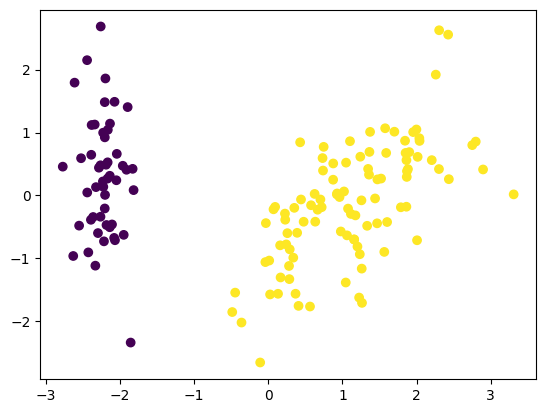

In [44]:
"""
A common approach to visualising data after we have clustered it, is to use a dimensionality
reduction method such as PCA.
"""
data_scaled = StandardScaler().fit_transform(data)

pca = PCA(n_components=2)
data_reduced = pca.fit_transform(data_scaled)

gmm = GaussianMixture(n_components=2)
gmm.fit(data)

fig, ax = plt.subplots()

ax.scatter(data_reduced[:, 0], data_reduced[:, 1], c=gmm.predict(data))
